# NoSQL (MongoDB) (sesión 4)

![Image of MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB-Logo-5c3a7405a85675366beb3a5ec4c032348c390b3f142f5e6dddf1d78e2df5cb5c.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en la máquina virtual usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

Lo primero que se hará será instalar la versión 3.2 de mongodb. Ésta no viene por defecto en la máquina virtual, y sólo hay que hacerlo una vez, aunque no pasa nada si se repite.

In [27]:
# Config
port = 27017
%env DIR=/tmp
%env MONGOPORT=$port

env: DIR=/tmp
env: MONGOPORT=27017


In [28]:
%%bash
sudo apt-key adv --keyserver hkp://keyserver.ubuntu.com:80 --recv EA312927
echo "deb http://repo.mongodb.org/apt/ubuntu xenial/mongodb-org/3.2 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-3.2.list
sudo apt-get update
sudo apt-get install -y mongodb-org

Executing: gpg --ignore-time-conflict --no-options --no-default-keyring --homedir /tmp/tmp.vd0skhjybF --no-auto-check-trustdb --trust-model always --keyring /etc/apt/trusted.gpg --primary-keyring /etc/apt/trusted.gpg --keyserver hkp://keyserver.ubuntu.com:80 --recv EA312927
deb http://repo.mongodb.org/apt/ubuntu xenial/mongodb-org/3.2 multiverse
Ign http://repo.mongodb.org xenial/mongodb-org/3.2 InRelease
Hit http://security.ubuntu.com wily-security InRelease
Hit http://archive.ubuntu.com wily InRelease
Hit http://archive.ubuntu.com wily-updates InRelease
Hit http://security.ubuntu.com wily-security/main Sources
Hit http://archive.ubuntu.com wily-backports InRelease
Hit http://security.ubuntu.com wily-security/restricted Sources
Hit http://archive.ubuntu.com wily/main Sources
Hit http://security.ubuntu.com wily-security/universe Sources
Hit http://archive.ubuntu.com wily/restricted Sources
Hit http://security.ubuntu.com wily-security/multiverse Sources
Hit http://security.ubuntu.com wi

gpg: requesting key EA312927 from hkp server keyserver.ubuntu.com
gpg: key EA312927: "MongoDB 3.2 Release Signing Key <packaging@mongodb.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1


In [29]:
!sudo service mongod start

In [30]:
!mongo -version

MongoDB shell version: 3.2.10


In [31]:
!echo 'show log global' | mongo

MongoDB shell version: 3.2.10
connecting to: test
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] MongoDB starting : pid=1733 port=27017 dbpath=/var/lib/mongodb 64-bit host=vagrant-bdge
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] db version v3.2.10
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] git version: 79d9b3ab5ce20f51c272b4411202710a082d0317
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] OpenSSL version: OpenSSL 1.0.2d 9 Jul 2015
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] allocator: tcmalloc
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] modules: none
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] build environment:
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten]     distmod: ubuntu1604
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten]     distarch: x86_64
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten]     target_arch: x86_64
2016-12-03T10:15:05.090+0000 I CONTROL  [initandlisten] options:

## OJO: Algunas versiones de pymongo han dado fallos en el retorno de cursores en aggregate. Hay que actualizar a la última versión:

In [32]:
!sudo pip2 install --upgrade pymongo

Requirement already up-to-date: pymongo in /usr/local/lib/python2.7/dist-packages
Cleaning up...


In [33]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [34]:
import pymongo
from pymongo import MongoClient

La conexión se inicia con `MongoClient`.

In [35]:
client = MongoClient("localhost", port)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [36]:
client.database_names()

[u'local', u'stackoverflow']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

In [37]:
%%bash
(test -e $DIR/Posts.csv && echo "Ya descargado") || (\
(wget http://neuromancer.inf.um.es:8080/es.stackoverflow/Posts.csv.gz -O - 2>/dev/null | gunzip > $DIR/Posts.csv) \
  && echo OK)

Ya descargado


In [38]:
%%bash
(test -e $DIR/Users.csv && echo "Ya descargado") || (\
(wget http://neuromancer.inf.um.es:8080/es.stackoverflow/Users.csv.gz -O - 2>/dev/null | gunzip > $DIR/Users.csv) \
  && echo OK)

Ya descargado


In [39]:
%%bash
(test -e $DIR/Tags.csv && echo "Ya descargado") || (\
(wget http://neuromancer.inf.um.es:8080/es.stackoverflow/Tags.csv.gz -O - 2>/dev/null | gunzip > $DIR/Tags.csv) \
  && echo OK)

Ya descargado


In [40]:
%%bash
(test -e $DIR/Comments.csv && echo "Ya descargado") || (\
(wget http://neuromancer.inf.um.es:8080/es.stackoverflow/Comments.csv.gz -O - 2>/dev/null | gunzip > $DIR/Comments.csv) \
  && echo OK)

Ya descargado


In [41]:
%%bash
(test -e $DIR/Votes.csv && echo "Ya descargado") || (\
(wget http://neuromancer.inf.um.es:8080/es.stackoverflow/Votes.csv.gz -O - 2>/dev/null | gunzip > $DIR/Votes.csv) \
  && echo OK)

Ya descargado


Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [42]:
db = client.stackoverflow
db = client['stackoverflow']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow')

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

In [43]:
posts = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'posts')

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [44]:
%%bash
mongoimport --db stackoverflow --collection posts --drop --type csv \
   --headerline --host=127.0.0.1:$MONGOPORT --file $DIR/Posts.csv

2016-12-03T10:17:42.372+0000	connected to: 127.0.0.1:27017
2016-12-03T10:17:42.372+0000	dropping: stackoverflow.posts
2016-12-03T10:17:44.330+0000	imported 17946 documents


In [45]:
%%bash
mongoimport --db stackoverflow --collection users --drop --type csv \
   --headerline --host=127.0.0.1:$MONGOPORT --file $DIR/Users.csv

2016-12-03T10:17:44.397+0000	connected to: 127.0.0.1:27017
2016-12-03T10:17:44.398+0000	dropping: stackoverflow.users
2016-12-03T10:17:44.913+0000	imported 10930 documents


In [46]:
%%bash
mongoimport --db stackoverflow --collection votes --drop --type csv \
   --headerline --host=127.0.0.1:$MONGOPORT --file $DIR/Votes.csv

2016-12-03T10:17:44.966+0000	connected to: 127.0.0.1:27017
2016-12-03T10:17:44.966+0000	dropping: stackoverflow.votes
2016-12-03T10:17:46.075+0000	imported 40655 documents


In [47]:
%%bash
mongoimport --db stackoverflow --collection comments --drop --type csv \
   --headerline --host=127.0.0.1:$MONGOPORT --file $DIR/Comments.csv

2016-12-03T10:17:46.146+0000	connected to: 127.0.0.1:27017
2016-12-03T10:17:46.147+0000	dropping: stackoverflow.comments
2016-12-03T10:17:47.609+0000	imported 25231 documents


In [48]:
%%bash
mongoimport --db stackoverflow --collection tags --drop --type csv \
   --headerline --host=127.0.0.1:$MONGOPORT --file $DIR/Tags.csv

2016-12-03T10:17:47.685+0000	connected to: 127.0.0.1:27017
2016-12-03T10:17:47.686+0000	dropping: stackoverflow.tags
2016-12-03T10:17:47.712+0000	imported 873 documents


In [49]:
posts.count()

17946

In [50]:
def print_respuestas(respuestas):
    for r in respuestas:
        pp(r)

El API de colección en Python se puede encontrar aquí: https://api.mongodb.com/python/current/api/pymongo/collection.html. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior.

In [51]:
respuestas = posts.find({ '$and' : [ {"PostTypeId": 2} ,
                                    {"Id" : {'$gte' : 100}} ]}).limit(10)
print_respuestas(respuestas)

{u'AcceptedAnswerId': u'',
 u'AnswerCount': u'',
 u'Body': u'<pre><code>$ git reset --soft HEAD~  o $ git reset --soft HEAD~1       #1<br/>// Cambios necesarios //                                    #2<br/>$ git add ...                                               #3<br/>$ git commit ...                                            #4<br/></code></pre><br/><br/><p>Simplemente haces un reset soft, con lo que te quedas con los cambios en local pero deshaces el commit, despu\xe9s haces lo que quieras y vuelves a hacer el commit como quer\xedas la primera vez.</p><br/>',
 u'ClosedDate': u'',
 u'CommentCount': 0,
 u'CommunityOwnedDate': u'',
 u'CreationDate': u'2015-12-01T19:00:31.680',
 u'FavoriteCount': u'',
 u'Id': 102,
 u'LastActivityDate': u'2015-12-01T19:00:31.680',
 u'LastEditDate': u'',
 u'LastEditorDisplayName': u'',
 u'LastEditorUserId': u'',
 u'OwnerDisplayName': u'',
 u'OwnerUserId': 178,
 u'ParentId': 90,
 u'PostTypeId': 2,
 u'Score': 8,
 u'Tags': u'',
 u'Title': u'',
 u'ViewCou

## Map-Reduce

Mongodb incluye dos APIs para procesar y buscar documentos: el API de Map-Reduce y el API de agregación. Veremos primero el de Map-Reduce. Manual: https://docs.mongodb.com/manual/aggregation/#map-reduce. También el API (en Javascript) de la propia función `mapReduce()` de MongoDB muestra todas las opciones disponibles: https://docs.mongodb.com/manual/reference/command/mapReduce/#dbcmd.mapReduce.

![imagen](https://docs.mongodb.com/manual/_images/map-reduce.png)

In [52]:
from bson.code import Code

map = Code("function () {"
           "  emit(this.OwnerUserId, 1);"
           "}")

In [53]:
reduce = Code("function (key, values) {"
              "  return Array.sum(values);"
              "}")

In [54]:
results = posts.map_reduce(map, reduce, "posts_by_userid")

In [55]:
posts_by_userid = db.posts_by_userid
print_respuestas(posts_by_userid.find())

{u'_id': -1.0, u'value': 91.0}
{u'_id': 20.0, u'value': 110.0}
{u'_id': 21.0, u'value': 42.0}
{u'_id': 22.0, u'value': 26.0}
{u'_id': 23.0, u'value': 31.0}
{u'_id': 24.0, u'value': 228.0}
{u'_id': 25.0, u'value': 301.0}
{u'_id': 26.0, u'value': 18.0}
{u'_id': 27.0, u'value': 1.0}
{u'_id': 28.0, u'value': 60.0}
{u'_id': 29.0, u'value': 3.0}
{u'_id': 34.0, u'value': 21.0}
{u'_id': 35.0, u'value': 5.0}
{u'_id': 36.0, u'value': 1.0}
{u'_id': 37.0, u'value': 3.0}
{u'_id': 58.0, u'value': 1.0}
{u'_id': 65.0, u'value': 40.0}
{u'_id': 67.0, u'value': 2.0}
{u'_id': 71.0, u'value': 3.0}
{u'_id': 73.0, u'value': 275.0}
{u'_id': 74.0, u'value': 20.0}
{u'_id': 75.0, u'value': 9.0}
{u'_id': 77.0, u'value': 1.0}
{u'_id': 78.0, u'value': 24.0}
{u'_id': 83.0, u'value': 25.0}
{u'_id': 87.0, u'value': 10.0}
{u'_id': 90.0, u'value': 1.0}
{u'_id': 91.0, u'value': 2.0}
{u'_id': 92.0, u'value': 3.0}
{u'_id': 93.0, u'value': 10.0}
{u'_id': 95.0, u'value': 850.0}
{u'_id': 98.0, u'value': 3.0}
{u'_id': 100.0, u

Se le puede añadir una etiqueta para especificar sobre qué elementos queremos trabajar (`query`):

La función `map_reduce` puede llevar añadida una serie de *keywords*, los mismos especificados en la documentación:

- `query`: Restringe los datos que se tratan
- `sort`: Ordena los documentos de entrada por alguna clave
- `limit`: Limita el número de resultados
- `out`: Especifica la colección de salida y otras opciones. Lo veremos después.
- etc.

In [56]:
%%timeit
results = posts.map_reduce(map, reduce, "myresults", query={"Score": {'$gt' : 20}}, sort={'OwnerUserId': 1})
r = list(results.find())
print_respuestas(results.find())

{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'va

In [57]:
%%timeit
results = posts.map_reduce(map, reduce, "myresults", query={"Score": {'$gt' : 20}})
r = list(results.find())
print_respuestas(results.find())

{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'value': 1.0}
{u'_id': 416.0, u'value': 2.0}
{u'_id': 517.0, u'value': 1.0}
{u'_id': 649.0, u'value': 1.0}
{u'_id': 20.0, u'value': 1.0}
{u'_id': 21.0, u'value': 3.0}
{u'_id': 23.0, u'value': 1.0}
{u'_id': 100.0, u'value': 1.0}
{u'_id': 149.0, u'value': 1.0}
{u'_id': 175.0, u'va

En el parámetro `out` se puede especificar en qué colección se quedarán los datos resultado del map-reduce. Por defecto, en la colección origen. (Todos los parámetros aquí: https://docs.mongodb.com/manual/reference/command/mapReduce/#mapreduce-out-cmd). En la operación `map_reduce()`  podemos especificar la colección de salida, pero también podemos añadir un parámetro final `out={...}`.

Hay varias posibilidades para `out`:

- `replace`: Sustituye la colección, si la hubiera, con la especificada (p. ej.: `out={ "replace" : "coll" }`.
- `merge`: Mezcla la colección existente, sustituyendo los documentos que existan por los generados.
- `reduce`: Si existe un documento con el mismo \_id en la colección, se aplica la función `reduce` para *fusionar* ambos documentos y producir un nuevo documento.

Veremos a continuación, al resolver el ejercicio de crear `post_comments` con map-reduce cómo se utilizan estas posibilidades.

## Framework de Agregación

Framework de agregación: https://docs.mongodb.com/manual/reference/operator/aggregation/. Y aquí una presentación interesante sobre el tema: https://www.mongodb.com/presentations/aggregation-framework-0?jmp=docs&_ga=1.223708571.1466850754.1477658152

![agragación](https://docs.mongodb.com/manual/_images/aggregation-pipeline.png)

In [58]:
respuestas = posts.aggregate( [ {'$project' : { 'Id' : 1 }}, {'$limit': 20} ])
print_respuestas(respuestas)

{u'Id': 3, u'_id': ObjectId('58429bc697c3c1db820220d3')}
{u'Id': 4, u'_id': ObjectId('58429bc697c3c1db820220d4')}
{u'Id': 2, u'_id': ObjectId('58429bc697c3c1db820220d5')}
{u'Id': 15, u'_id': ObjectId('58429bc697c3c1db820220de')}
{u'Id': 219, u'_id': ObjectId('58429bc697c3c1db82022188')}
{u'Id': 1, u'_id': ObjectId('58429bc697c3c1db820220d2')}
{u'Id': 5, u'_id': ObjectId('58429bc697c3c1db820220d6')}
{u'Id': 7, u'_id': ObjectId('58429bc697c3c1db820220d7')}
{u'Id': 8, u'_id': ObjectId('58429bc697c3c1db820220d8')}
{u'Id': 6, u'_id': ObjectId('58429bc697c3c1db820220d9')}
{u'Id': 10, u'_id': ObjectId('58429bc697c3c1db820220da')}
{u'Id': 11, u'_id': ObjectId('58429bc697c3c1db820220db')}
{u'Id': 9, u'_id': ObjectId('58429bc697c3c1db820220dc')}
{u'Id': 12, u'_id': ObjectId('58429bc697c3c1db820220dd')}
{u'Id': 14, u'_id': ObjectId('58429bc697c3c1db820220df')}
{u'Id': 16, u'_id': ObjectId('58429bc697c3c1db820220e0')}
{u'Id': 17, u'_id': ObjectId('58429bc697c3c1db820220e1')}
{u'Id': 19, u'_id': Ob

In [59]:
# Join on OwnerUserId=Id
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users", 
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        }
        ])
print_respuestas(respuestas)

{u'AcceptedAnswerId': u'',
 u'AnswerCount': u'',
 u'Body': u'<p>Asumiendo que se est\xe1 haciendo un <code>join</code> de columnas sin duplicados, lo cu\xe1l es un caso com\xfan:</p><br/><br/><ul><br/><li><p>Un <strong>inner join</strong> de A y B entregar\xe1 el resultado de la intersecci\xf3n de los conjuntos A y B. En otras lapabras, la parte <em>interna</em> \u2013intersecci\xf3n\u2013 en un diagrama de Venn.</p></li><br/><li><p>Un <strong>full outer join</strong> entre A y B entregar\xe1 el resultado de la uni\xf3n de A y B. En otras palabras, la parte <em>externa</em> \u2013uni\xf3n\u2013 en un diagrama de Venn .</p></li><br/></ul><br/><br/><h1>Ejemplos:</h1><br/><br/><p>Supongamos que tenemos dos tablas, con una sola columna cada una y los siguientes datos:</p><br/><br/><pre><code>A    B<br/>-    -<br/>1    3<br/>2    4<br/>3    5<br/>4    6<br/></code></pre><br/><br/><p>Nota que (1,2) solo se encuentran en A, (3,4) son comunes y (5,6) solamente se encuentran en B.</p><br/><br/>

In [60]:
# Join on OwnerUserId=Id 
# Muestra solo Id, Score, username (seleccionando el primero del array resultante de la union)
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 20}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        { '$project' :
        {
            'Id' : 1,
            'Score' : 1,
            'username' : {'$arrayElemAt' : ['$owner.DisplayName', 0]},
            'owner.DisplayName'  : 1
        }}
        ])
print_respuestas(respuestas)

{u'Id': 33,
 u'Score': 23,
 u'_id': ObjectId('58429bc697c3c1db820220ee'),
 u'owner': [{u'DisplayName': u'jachguate'}],
 u'username': u'jachguate'}
{u'Id': 36,
 u'Score': 27,
 u'_id': ObjectId('58429bc697c3c1db820220f1'),
 u'owner': [{u'DisplayName': u'jachguate'}],
 u'username': u'jachguate'}
{u'Id': 38,
 u'Score': 20,
 u'_id': ObjectId('58429bc697c3c1db820220f4'),
 u'owner': [{u'DisplayName': u'Carlos Mu\xf1oz'}],
 u'username': u'Carlos Mu\xf1oz'}
{u'Id': 40,
 u'Score': 55,
 u'_id': ObjectId('58429bc697c3c1db820220f7'),
 u'owner': [{u'DisplayName': u'jachguate'}],
 u'username': u'jachguate'}
{u'Id': 94,
 u'Score': 34,
 u'_id': ObjectId('58429bc697c3c1db82022118'),
 u'owner': [{u'DisplayName': u'Jcl'}],
 u'username': u'Jcl'}
{u'Id': 142,
 u'Score': 20,
 u'_id': ObjectId('58429bc697c3c1db82022146'),
 u'owner': [{u'DisplayName': u'Mariano'}],
 u'username': u'Mariano'}
{u'Id': 151,
 u'Score': 27,
 u'_id': ObjectId('58429bc697c3c1db8202214d'),
 u'owner': [{u'DisplayName': u'Hewbot'}],
 u'u

## EJERCICIO: Construir, con el API de agregación, una colección 'post_comments', donde se añade el campo 'Comments' a cada Post con la lista de todos los comentarios referidos a un Post.

In [61]:
%%timeit
post_comments = posts.aggregate([
        {'$lookup': {
            'from': "comments",
            'localField': "Id",
            'foreignField': "PostId",
            'as': "Comments"}
        },
        {'$project':{
            'Id': 1,
            'Title': 1,
            'CommentCount': 1,
            'Comments': 1
        }}
        ])

c = list(post_comments)
c[:5]

KeyboardInterrupt: 

In [85]:
posts.create_index([('Id', pymongo.HASHED)])

u'Id_hashed'

In [86]:
%%timeit
post_comments = posts.aggregate([
        {'$lookup': {
            'from': "comments",
            'localField': "Id",
            'foreignField': "PostId",
            'as': "Comments"}
        },
        {'$project':{
            'Id': 1,
            'Title': 1,
            'CommentCount': 1,
            'Comments': 1
        }}
        ])

c = list(post_comments)
c[:5]

1 loop, best of 3: 942 ms per loop


In [87]:
db.comments.create_index([('PostId', pymongo.HASHED)])

u'PostId_hashed'

In [88]:
%%timeit
post_comments = posts.aggregate([
        {'$lookup': {
            'from': "comments",
            'localField': "Id",
            'foreignField': "PostId",
            'as': "Comments"}
        },
        {'$project':{
            'Id': 1,
            'Title': 1,
            'CommentCount': 1,
            'Comments': 1
        }}
        ])

c = list(post_comments)
c[:5]

1 loop, best of 3: 974 ms per loop


Comprobado: es por la cantidad de elementos en los que busca.

## EJERCICIO: Construir, con el API de Map-Reduce, una colección 'post_comments', donde se añade el campo 'Comments' a cada Post con la lista de todos los comentarios referidos a un Post.

Veremos la resolución de este ejercicio para que haga de ejemplo para los siguientes a implementar. En primer lugar, una operación map/reduce sólo se puede ejecutar sobre una colección, así que sólo puede contener resultados de la misma. Por lo tanto, con sólo una operación map/reduce no va a ser posible realizar todo el ejercicio.

Así, en primer lugar, parece interesante agrupar todos los comentarios que se han producido de un Post en particular. En cada comentario, el atributo `PostId` marca una referencia al Post al que se refiere.

Es importante cómo se construyen las operaciones `map()` y `reduce()`. Primero, la función `map()` se ejecutará para todos los documentos (o para todos los que cumplan la condición si se utiliza el modificador `query=`). Sin embargo, la función `reduce()` no se ejecutará a no ser que haya más de un elemento asociado a la misma clave.

Por lo tanto, la salida de la función `map()` debe ser la misma que la de la función `reduce()`. En nuestro caso, es un objeto JSON de la forma:

    { type: 'comment', comments: [ {comentario1, comentario2} ] }

En el caso de que sólo se ejecute la función `map()`, nótese cómo el objeto tiene la misma composición, pero con un array de sólo un elemento (comentario): sí mismo.

In [66]:
from bson.code import Code

comments_map = Code("function () {"
           "  emit(this.PostId, { type: 'comment', comments: [this]});"
           "}")

comments_reduce = Code("function (key, values) {"
                       "  comments = [];"
                       "  for (i = 0, len = values.length; i < len; ++i) {"
                       "    if ('comments' in values[i])"
                       "      comments = comments.concat(values[i].comments);"
                       "  }"
                       "  return { type: 'comment', comments: comments };"
                       "}")

db.comments.map_reduce(comments_map, comments_reduce, "post_comments")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'post_comments')

In [67]:
r = list(db.post_comments.find())
r[:10]

[{u'_id': 1.0,
  u'value': {u'comments': [{u'CreationDate': u'2015-10-29T16:31:36.090',
     u'Id': 1,
     u'PostId': 1,
     u'Score': 0,
     u'Text': u'M\xe1s tarde a\xf1adir\xe9 la respuesta, pero si alguien quiere hacer los honores antes...',
     u'UserDisplayName': u'',
     u'UserId': 23,
     u'_id': ObjectId('58429bca97c3c1db8203306d')},
    {u'CreationDate': u'2015-10-29T18:03:06.780',
     u'Id': 2,
     u'PostId': 1,
     u'Score': 1,
     u'Text': u'\xa1Excelente! Nuestra primera pregunta. :)',
     u'UserDisplayName': u'',
     u'UserId': 4,
     u'_id': ObjectId('58429bca97c3c1db82033082')}],
   u'type': u'comment'}},
 {u'_id': 2.0,
  u'value': {u'comments': [{u'CreationDate': u'2015-10-29T19:14:50.617',
     u'Id': 3,
     u'PostId': 2,
     u'Score': 0,
     u'Text': u'...y aqu\xed tenemos nuestra primera respuesta. :-)',
     u'UserDisplayName': u'',
     u'UserId': 23,
     u'_id': ObjectId('58429bca97c3c1db8203306e')}],
   u'type': u'comment'}},
 {u'_id': 3.0,
  u

Después del primer paso de map/reduce, tenemos que construir la colección final que asocia cada Post con sus comentarios. Como hemos construido antes la colección `post_comments` indizada por el `Id` del Post, podemos utilizar ahora una ejecución de map/reduce que *mezcle* los datos en `post_comments` con los datos en `posts`.

La segunda ejecución de map/reduce la haremos sobre `posts`, para que el resultado sea completo, incluso para los Posts que no aparecen en comentarios, y por lo tanto tendrán el atributo `comments` vacío.

En este caso, debemos hacer que la función `map()` produzca una salida de documentos que también están indizados con el atributo `Id`, y, como sólo hay uno para cada `Id`, la función `reduce()` no se ejecutará. **Tan sólo se ejecutará para mezclar ambas colecciones**, así que la función `reduce()` tendrá que estar preparada para mezclar objetos de tipo "comment" y Posts. En cualquier caso, como se puede ver, es válida también aunque sólo se llame con un objeto de tipo Post. Finalmente, la función `map()` prepara a cada objeto Post, inicialmente, con una lista de comentarios vacíos

In [89]:
posts_map = Code("""
function () {
  obj = this;
  obj.comments = [];
  emit(this.Id, obj);
}
""")

posts_reduce = Code("""
function (key, values) {
  comments = []; // The set of comments
  obj = {}; // The object to return
  
  for (i = 0, len = values.length; i < len; ++i) {
    if ('type' in values[i] && values[i].type === 'comment')
      comments = comments.concat(values[i].comments);
    else // Object
    {
      obj = values[i];
      // obj.comments will always be there because of the map() operation
      comments = comments.concat(obj.comments);
    }
  }
  
  // Finalize: Add the comments to the object to return
  obj.comments = comments;
  return obj;
}
""")

db.posts.map_reduce(posts_map, posts_reduce, out={'reduce' : 'post_comments'})

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'post_comments')

In [69]:
r = list(db.post_comments.find())
r[:10]

[{u'_id': 7.0,
  u'value': {u'AcceptedAnswerId': u'',
   u'AnswerCount': u'',
   u'Body': u'<p>Lo de elegancia es algo dif\xedcil de decir, es cuesti\xf3n de gustos. Pero la legibilidad del c\xf3digo siempre es importante. Por eso, este c\xf3digo se puede simplificar as\xed: (a mi me parece mas legible)</p><br/><br/><pre><code>std::string tempStr;<br/>while(isstream >> tempStr) {<br/>    std::cout << tempStr << std::endl;<br/>}<br/></code></pre><br/><br/><p>Con lo cual, metiendo todo en una funci\xf3n quedar\xeda algo as\xed:</p><br/><br/><pre><code>std::vector<std::string> split_istringstream(std::string str) {<br/>    std::vector<std::string> resultado;<br/>    std::istringstream isstream(str);<br/>    std::string palabra;<br/><br/>    while(isstream >> palabra){<br/>        resultado.push_back(palabra);<br/>    }<br/><br/>    return resultado;<br/>}<br/></code></pre><br/><br/><p>Otra alternativa, que incluso permite definir el delimitador (el operador >> de <code>istringstream</code

## EJERCICIO: Relacionar en un scatterplot el 'Score' de una pregunta o respuesta con respecto al número de comentarios ('CommentCount')

#### Map/Reduce


In [70]:
from bson.code import Code

posts_map = Code("function () {"
           "  emit(this.Id, { Score: this.Score, CommentCount: this.CommentCount});"
           "}")

posts_reduce = Code("function (key, values) {"
                       "  return values" 
                       "}")

db.posts.map_reduce(posts_map, posts_reduce, "posts_score_comments")

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'posts_score_comments')

In [71]:
r = list(db.posts_score_comments.find())
r[:10]

[{u'_id': 1.0, u'value': {u'CommentCount': 2.0, u'Score': 6.0}},
 {u'_id': 2.0, u'value': {u'CommentCount': 1.0, u'Score': 7.0}},
 {u'_id': 3.0, u'value': {u'CommentCount': 1.0, u'Score': 7.0}},
 {u'_id': 4.0, u'value': {u'CommentCount': 0.0, u'Score': 2.0}},
 {u'_id': 5.0, u'value': {u'CommentCount': 5.0, u'Score': 11.0}},
 {u'_id': 6.0, u'value': {u'CommentCount': 8.0, u'Score': 3.0}},
 {u'_id': 7.0, u'value': {u'CommentCount': 0.0, u'Score': 11.0}},
 {u'_id': 8.0, u'value': {u'CommentCount': 1.0, u'Score': 6.0}},
 {u'_id': 9.0, u'value': {u'CommentCount': 1.0, u'Score': 5.0}},
 {u'_id': 10.0, u'value': {u'CommentCount': 2.0, u'Score': 7.0}}]

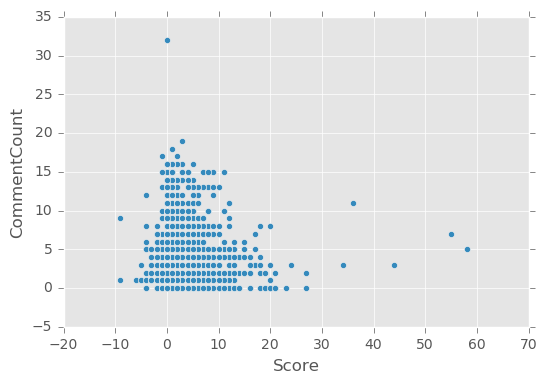

In [72]:
post_sc_map_df = pd.DataFrame(res['value'] for res in r)
post_sc_map_df.plot.scatter(x='Score', y='CommentCount');

#### Aggregation

In [73]:
post_score_comments = posts.aggregate([
        {'$project':{
            'Score': 1,
            'CommentCount': 1
        }}
        ])

c = list(post_score_comments)
c[:5]

[{u'CommentCount': 1,
  u'Score': 7,
  u'_id': ObjectId('58429bc697c3c1db820220d3')},
 {u'CommentCount': 0,
  u'Score': 2,
  u'_id': ObjectId('58429bc697c3c1db820220d4')},
 {u'CommentCount': 1,
  u'Score': 7,
  u'_id': ObjectId('58429bc697c3c1db820220d5')},
 {u'CommentCount': 0,
  u'Score': 0,
  u'_id': ObjectId('58429bc697c3c1db820220de')},
 {u'CommentCount': 0,
  u'Score': 0,
  u'_id': ObjectId('58429bc697c3c1db82022188')}]

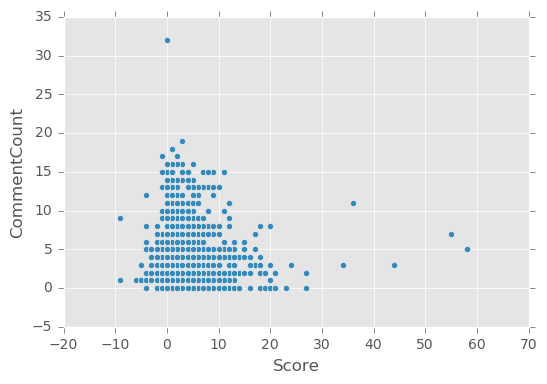

In [74]:
post_sc_agg_df = pd.DataFrame(c)
post_sc_agg_df.plot.scatter(x='Score', y='CommentCount')


#### Sin Framework


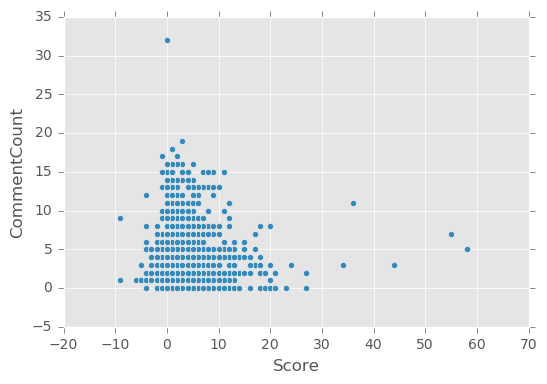

In [75]:
data = [[p['Score'],p['CommentCount']] for p in db.posts.find()
]
post_sc_none_df = pd.DataFrame(data, columns=('Score','CommentCount'))
post_sc_none_df.plot.scatter(x='Score', y='CommentCount')

In [76]:
# Comprobar que todos los df son iguales

## Índices

Se pueden crear más índices, de tipos `ASCENDING`, `DESCENDING`, `HASHED`, y otros geoespaciales. https://api.mongodb.com/python/current/api/pymongo/collection.html#pymongo.collection.Collection.create_index

In [202]:
%%timeit
res = posts.find({'OwnerUserId' :  22},projection={'Id' :1, 'OwnerUserId': 1})
r = list(res)

1000 loops, best of 3: 869 µs per loop


In [78]:
posts.create_index([('OwnerUserId', pymongo.HASHED)])

u'OwnerUserId_hashed'

In [79]:
%%timeit
res = posts.find({'OwnerUserId' :  22},projection={'Id' :1, 'OwnerUserId': 1})
r = list(res)

The slowest run took 4.23 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 509 µs per loop


## Esquemas: Mongothon

El siguiente comando instala la librería python `mongothon`, que no viene instalada en la máquina virtual. Esta librería nos permite definir esquemas por los que se regirán los datos de las colecciones. Está basada en la librería para Javascript `mongoose`.

In [80]:
!sudo pip install --upgrade git+https://github.com/dsevilla/mongothon.git@patch-2

Downloading/unpacking git+https://github.com/dsevilla/mongothon.git@patch-2
  Cloning https://github.com/dsevilla/mongothon.git (to patch-2) to /tmp/pip-cp3HqG-build
^C
Cleaning up...
Operation cancelled by user
Storing debug log for failure in /home/vagrant/.pip/pip.log


   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

In [81]:
from mongothon import Schema, create_model
from datetime import datetime

votes_schema = Schema({
            "Id":         {"type": int, "required": True},
            "PostId":        {"type": int, "required": True},
            "VoteTypeId":   {"type": int }, # Podría hacerse un enum con "validates": one_of("AcceptedByOriginator", "UpMod", etc.)
            "CreationDate": {"type": datetime},
            "UserId" : { "type" : int},
            "BountyAmount" : {"type": int}
        })

Votes = create_model(votes_schema, db.votes)

In [82]:
# Crear un nuevo voto
vote1 = Votes({'Id': 1000000, 'PostId': 1, 'VoteTypeId': 1})

# Guardarlo en la Base de datos
vote1.save()

# Encontrarlo por su _id
vote2 = Votes.find_by_id(vote1['_id'])
vote2

{u'Id': 1000000,
 u'PostId': 1,
 u'VoteTypeId': 1,
 u'_id': ObjectId('58429d026252f6065d7b67e7')}

In [83]:
# Se comprueba que el voto se ha añadido a la colección con las funciones estándar de pymongo:
result = db.votes.find({'Id' : 1000000})
print list(result)

[{u'VoteTypeId': 1, u'PostId': 1, u'_id': ObjectId('58429d026252f6065d7b67e7'), u'Id': 1000000}]


## EJERCICIO: Con Map-Reduce y con el Framework de Agregación, mostrar las consultas RQ1 y RQ2 de la sesión 2

### RQ1 - Histograma de preguntas (Número de preguntas publicadas por developers)

Consulta SQL:

```
quest_dev_ask = %sql SELECT q.numQ, Count(*) as freq \
                 FROM (SELECT Count(*) as numQ \
                         FROM PostsPart \
                         WHERE PostTypeId=1 GROUP BY OwnerUserId) as q    \
                 GROUP BY q.numQ;
quest_dev_ask
```


#### Map/Reduce

Empezamos por la consulta anidada que es más sencillo:

In [189]:
from bson.code import Code

rq1_posts_map = Code("function () {"
           "if(this.PostTypeId==1 && this.OwnerUserId>0)" ## La segunda condicion es importante para obtener mismos
           "  emit(this.OwnerUserId, 1);"                 ## resultados que en SQL, seguramente debido a id's raros
           "}")

rq1_posts_reduce = Code("function (key, values) {"
                       "  return Array.sum(values);" 
                       "}"
                       )

db.posts.map_reduce(rq1_posts_map, 
                    rq1_posts_reduce, 
                    'rq1_posts_questioners')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq1_posts_questioners')

In [183]:
r = list(db.rq1_posts_questioners.find())
r[:20]

[{u'_id': 20.0, u'value': 1.0},
 {u'_id': 21.0, u'value': 12.0},
 {u'_id': 22.0, u'value': 14.0},
 {u'_id': 23.0, u'value': 7.0},
 {u'_id': 24.0, u'value': 20.0},
 {u'_id': 25.0, u'value': 12.0},
 {u'_id': 27.0, u'value': 1.0},
 {u'_id': 29.0, u'value': 2.0},
 {u'_id': 34.0, u'value': 1.0},
 {u'_id': 35.0, u'value': 3.0},
 {u'_id': 37.0, u'value': 2.0},
 {u'_id': 65.0, u'value': 14.0},
 {u'_id': 73.0, u'value': 3.0},
 {u'_id': 74.0, u'value': 2.0},
 {u'_id': 75.0, u'value': 4.0},
 {u'_id': 77.0, u'value': 1.0},
 {u'_id': 78.0, u'value': 12.0},
 {u'_id': 83.0, u'value': 6.0},
 {u'_id': 90.0, u'value': 1.0},
 {u'_id': 92.0, u'value': 3.0}]

A continuación aplicamos la misma estrategia vista para la consulta explicada [anteriormente](http://localhost:8888/notebooks/jcervant/Master-bgde/sesion4/sesion4.ipynb#EJERCICIO:-Construir,-con-el-API-de-Map-Reduce,-una-colección-'post_comments',-donde-se-añade-el-campo-'Comments'-a-cada-Post-con-la-lista-de-todos-los-comentarios-referidos-a-un-Post.). Lo que vamos a hacer es usar esta nueva colección recién creada para realizar una agrupación por `value` de manera que podamos agrupar por número de preguntas realizadas por cada developer.

In [184]:
from bson.code import Code

rq1_posts_map_2 = Code("function () {"
           "  emit(this.value, 1);"
           "}")

rq1_posts_reduce_2 = Code("function (key, values) {"
                       "  return Array.sum(values);" 
                       "}"
                       )

db.rq1_posts_questioners.map_reduce(rq1_posts_map_2, 
                    rq1_posts_reduce_2, 
                    'rq1_posts_questioners')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq1_posts_questioners')

In [185]:
r = list(db.rq1_posts_questioners.find())
r[:20]

[{u'_id': 1.0, u'value': 1650.0},
 {u'_id': 2.0, u'value': 360.0},
 {u'_id': 3.0, u'value': 165.0},
 {u'_id': 4.0, u'value': 100.0},
 {u'_id': 5.0, u'value': 54.0},
 {u'_id': 6.0, u'value': 56.0},
 {u'_id': 7.0, u'value': 38.0},
 {u'_id': 8.0, u'value': 22.0},
 {u'_id': 9.0, u'value': 29.0},
 {u'_id': 10.0, u'value': 20.0},
 {u'_id': 11.0, u'value': 7.0},
 {u'_id': 12.0, u'value': 16.0},
 {u'_id': 13.0, u'value': 4.0},
 {u'_id': 14.0, u'value': 7.0},
 {u'_id': 15.0, u'value': 7.0},
 {u'_id': 16.0, u'value': 8.0},
 {u'_id': 17.0, u'value': 8.0},
 {u'_id': 18.0, u'value': 6.0},
 {u'_id': 19.0, u'value': 2.0},
 {u'_id': 20.0, u'value': 7.0}]

In [186]:
rq1_quest_dev_df = pd.DataFrame(r)
rq1_quest_dev_df

,_id,value
0,1.0,1650.0
1,2.0,360.0
2,3.0,165.0
3,4.0,100.0
4,5.0,54.0
5,6.0,56.0
6,7.0,38.0
7,8.0,22.0
8,9.0,29.0
9,10.0,20.0


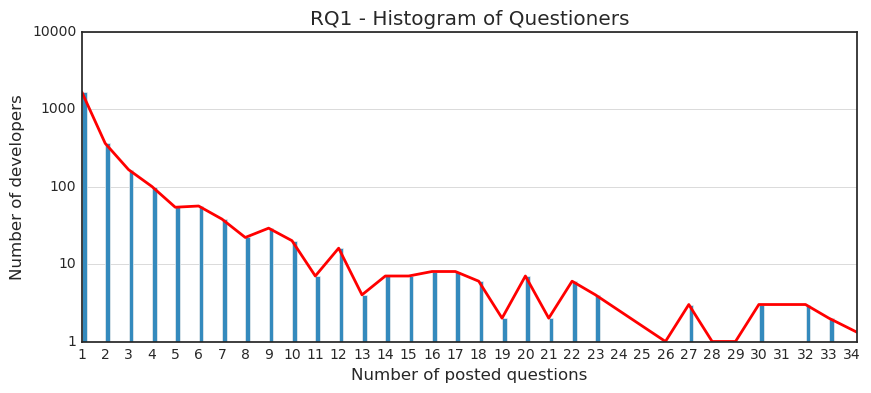

In [190]:
import numpy as np
plt.style.use('seaborn-white')

x = rq1_quest_dev_df['_id']
x = [int(a) for a in x]
y = rq1_quest_dev_df['value']

import matplotlib.ticker

plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.2) # Bar chart
plt.xlabel("Number of posted questions")
plt.ylabel("Number of developers")
plt.yscale('log')
plt.xticks([a for a in range(max(x))])
plt.title("RQ1 - Histogram of Questioners")
plt.gca().set_color_cycle(['red'])
plt.plot(x, y, linewidth=2.0) # line 
plt.xlim(1, np.percentile(x, 80))
plt.grid(zorder=0, which='major', axis='y')
ax = plt.gca()
# Formatea el eje Y con números en lugar de potencias de 10
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))

plt.show()


#### Aggregation

Empezamos de nuevo realizando la operación más básica necesaria en un paso. En este caso agrupamos y ordenamos para ver si la consulta realiza lo esperado:

In [215]:
rq1_posts_questioners_agg = posts.aggregate([
        {"$group" : {"_id":"$OwnerUserId"}},
        {"$sort"  : {"_id": 1}} # orden descendente
        ])

c = list(rq1_posts_questioners_agg)
c[:10]

[{u'_id': 20, u'count': 1},
 {u'_id': 21, u'count': 12},
 {u'_id': 22, u'count': 14},
 {u'_id': 23, u'count': 7},
 {u'_id': 24, u'count': 20},
 {u'_id': 25, u'count': 12},
 {u'_id': 27, u'count': 1},
 {u'_id': 29, u'count': 2},
 {u'_id': 34, u'count': 1},
 {u'_id': 35, u'count': 3}]

A continuación agregamos los comandos para seleccionar sólo los posts de tipo pregunta y agregarlos por usuario:

In [237]:
rq1_posts_questioners_agg = posts.aggregate([
        {"$match" : {"PostTypeId" : { "$eq" : 1}}},
        {"$group" : {"_id":"$OwnerUserId", "count": {"$sum":1}}},
        {"$sort"  : {"_id": 1}}
        ])

c = list(rq1_posts_questioners_agg)
c[:10]

[{u'_id': 20, u'count': 1},
 {u'_id': 21, u'count': 12},
 {u'_id': 22, u'count': 14},
 {u'_id': 23, u'count': 7},
 {u'_id': 24, u'count': 20},
 {u'_id': 25, u'count': 12},
 {u'_id': 27, u'count': 1},
 {u'_id': 29, u'count': 2},
 {u'_id': 34, u'count': 1},
 {u'_id': 35, u'count': 3}]

Por último realizamos la segunda agrupación por número de preguntas y calculamos su frecuencia. En este caso vemos que es mucho más sencillo ya que podemos utilizar en la misma consulta el resultado intermedio obtenido por el comando anterior, esto nos permite realizar dos $group seguidos:

In [238]:
rq1_posts_questioners_agg = posts.aggregate([
        {"$match" : {"PostTypeId" : { "$eq" : 1}}},
        {"$group" : {"_id":"$OwnerUserId", "numQ": {"$sum":1}}},
        {"$group" : {"_id":"$numQ", "freq": {"$sum":1}}},
        {"$sort"  : {"_id": 1}}
        ])

c = list(rq1_posts_questioners_agg)
c[:10]

[{u'_id': 1, u'freq': 1650},
 {u'_id': 2, u'freq': 360},
 {u'_id': 3, u'freq': 165},
 {u'_id': 4, u'freq': 100},
 {u'_id': 5, u'freq': 54},
 {u'_id': 6, u'freq': 56},
 {u'_id': 7, u'freq': 38},
 {u'_id': 8, u'freq': 22},
 {u'_id': 9, u'freq': 29},
 {u'_id': 10, u'freq': 20}]

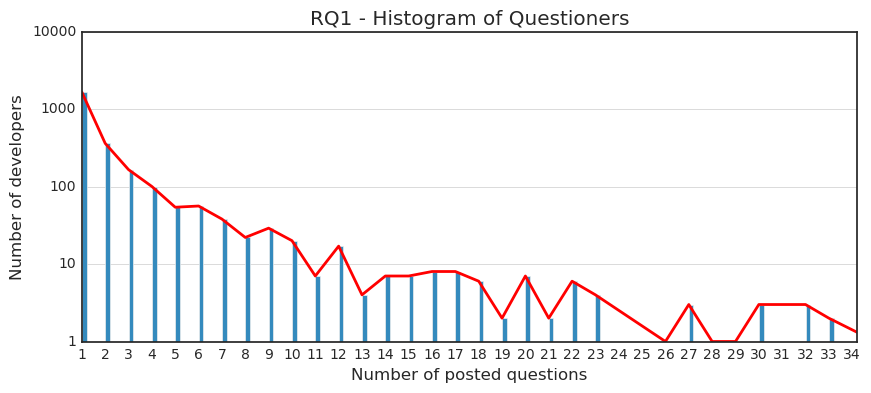

In [245]:
rq1_quest_dev_agg_df = pd.DataFrame(c)
rq1_quest_dev_agg_df
x = rq1_quest_dev_agg_df['_id']
x = [int(a) for a in x]
y = rq1_quest_dev_agg_df['freq']

import matplotlib.ticker

plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.2) # Bar chart
plt.xlabel("Number of posted questions")
plt.ylabel("Number of developers")
plt.yscale('log')
plt.xticks([a for a in range(max(x))])
plt.title("RQ1 - Histogram of Questioners")
plt.gca().set_color_cycle(['red'])
plt.plot(x, y, linewidth=2.0) # line 
plt.xlim(1, np.percentile(x, 80))
plt.grid(zorder=0, which='major', axis='y')
ax = plt.gca()
# Formatea el eje Y con números en lugar de potencias de 10
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))

plt.show()

### RQ2 - Histograma de respuestas (Número de respuestas publicadas por developers)


Consulta SQL:

```
quest_dev_ans = %sql SELECT 0 as numQ, COUNT(*) as freq \
                     FROM Users us LEFT JOIN (SELECT OwnerUserId, PostTypeId FROM PostsPart WHERE PostTypeId=2) as po ON us.Id = po.OwnerUserId WHERE ISNULL(po.PostTypeId) \
                     UNION \
                     SELECT q.numQ, COUNT(*) as freq \
                     FROM (SELECT OwnerUserId, COUNT(*) as numQ \
                         FROM PostsPart WHERE PostTypeId=2\
                         GROUP BY OwnerUserId) as q \
                     GROUP BY q.numQ;

quest_dev_ans
```

#### Aggregation

In [352]:
rq2_posts_answerers_agg = posts.aggregate([
        {"$match" : {"PostTypeId" : { "$eq" : 2}}},
        {"$group" : {"_id":"$OwnerUserId", "numQ": {"$sum":1}}},
        {"$group" : {"_id":"$numQ", "freq": {"$sum":1}}},
        {"$sort"  : {"_id": 1}}
        ])

c = list(rq2_posts_answerers_agg)
c[:10]

[{u'_id': 1, u'freq': 829},
 {u'_id': 2, u'freq': 260},
 {u'_id': 3, u'freq': 106},
 {u'_id': 4, u'freq': 68},
 {u'_id': 5, u'freq': 47},
 {u'_id': 6, u'freq': 51},
 {u'_id': 7, u'freq': 31},
 {u'_id': 8, u'freq': 17},
 {u'_id': 9, u'freq': 13},
 {u'_id': 10, u'freq': 12}]

In [353]:
rq2_posts_answerers_agg_df = pd.DataFrame(c)
rq2_posts_answerers_agg_df

,_id,freq
0,1,829
1,2,260
2,3,106
3,4,68
4,5,47
5,6,51
6,7,31
7,8,17
8,9,13
9,10,12


De nuevo en este caso tenemos el problema visto en la sesión 2, que nos faltan los usuarios que no publican ninguna respuesta. Lo calculamos en una query separada:

In [354]:
rq2_zero_posts_answerers_agg = db.users.aggregate([
        {"$lookup": {
                "from": "posts",
                "localField": "Id",
                "foreignField": "OwnerUserId",
                "as":"answers"
            }},
        {"$match" : { "answers.PostTypeId" :{"$ne":2}}}
        ])

zeroAns = list(rq2_zero_posts_answerers_agg)
zeroAns[:10]

[{u'AboutMe': u'<p>Hola, no soy una persona real.</p><br/><br/><p>\xa1Soy un proceso que ayuda a mantener el sitio limpio!</p><br/><br/><p>Hago cosas como:</p><br/><br/><ul><br/><li>Dar empujoncitos a preguntas antiguas sin respuesta aproximadamente cada hora, para que atraigan algo de atenci\xf3n</li><br/><li>Tener la propiedad de las preguntas y respuestas wiki para que nadie se lleve reputaci\xf3n por ellas</li><br/><li>Recibir la propiedad de los votos negativos en las publicaciones de spam o da\xf1inas que son borradas permanentemente</li><br/><li>Tener la propiedad de las ediciones sugeridas por usuarios an\xf3nimos</li><br/><li><a href="http://meta.stackoverflow.com/a/92006">Quitar preguntas abandonadas</a></li><br/></ul><br/>',
  u'AccountId': -1,
  u'Age': 16,
  u'CreationDate': u'2015-10-26T21:36:24.767',
  u'DisplayName': u'Comunidad',
  u'DownVotes': 492,
  u'Id': -1,
  u'LastAccessDate': u'2015-10-26T21:36:24.767',
  u'Location': u'en la granja de servidores',
  u'ProfileI

In [355]:
len(zeroAns)

9364

Por último agregamos este valor como un nuevo elemento al curso obtenido anteriormente:

In [356]:
pd.DataFrame(np.array([[0,len(zeroAns)]]), 
             columns=['_id', 'freq']).append(rq2_posts_answerers_agg_df, ignore_index=True)

,_id,freq
0,0,9364
1,1,829
2,2,260
3,3,106
4,4,68
5,5,47
6,6,51
7,7,31
8,8,17
9,9,13


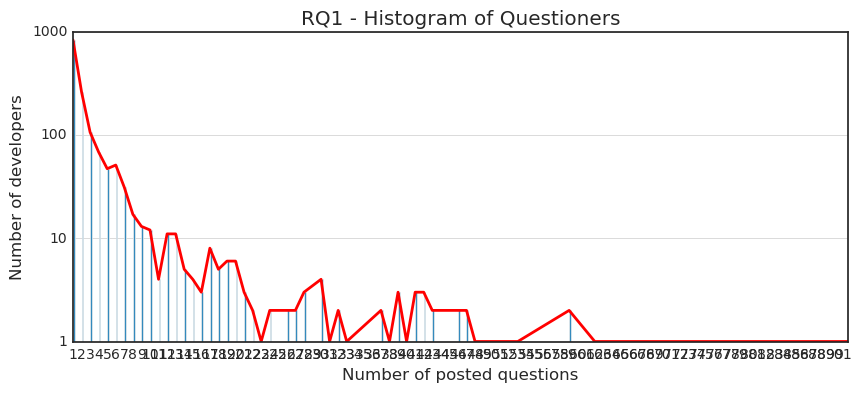

In [358]:
x = rq2_posts_answerers_agg_df['_id']
x = [int(a) for a in x]
y = rq2_posts_answerers_agg_df['freq']

import matplotlib.ticker

plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.2) # Bar chart
plt.xlabel("Number of posted questions")
plt.ylabel("Number of developers")
plt.yscale('log')
plt.xticks([a for a in range(max(x))])
plt.title("RQ1 - Histogram of Questioners")
plt.gca().set_color_cycle(['red'])
plt.plot(x, y, linewidth=2.0) # line 
plt.xlim(1, np.percentile(x, 80))
plt.grid(zorder=0, which='major', axis='y')
ax = plt.gca()
# Formatea el eje Y con números en lugar de potencias de 10
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(int(round(x)))))

plt.show()

#### Map/reduce

In [369]:
from bson.code import Code

rq2_ans_map = Code("function () {"
           "if(this.PostTypeId==2 && this.OwnerUserId>0)" ## La segunda condicion es importante para obtener mismos
           "  emit(this.OwnerUserId, 1);"                 ## resultados que en SQL, seguramente debido a id's raros
           "}")

rq2_ans_reduce = Code("function (key, values) {"
                       "  return Array.sum(values);" 
                       "}"
                       )

db.posts.map_reduce(rq2_ans_map, 
                    rq2_ans_reduce, 
                    'rq2_posts_answerers')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq2_posts_answerers')

In [370]:
r = list(db.rq2_posts_answerers.find())
r

[{u'_id': 20.0, u'value': 101.0},
 {u'_id': 21.0, u'value': 30.0},
 {u'_id': 22.0, u'value': 8.0},
 {u'_id': 23.0, u'value': 20.0},
 {u'_id': 24.0, u'value': 104.0},
 {u'_id': 25.0, u'value': 221.0},
 {u'_id': 26.0, u'value': 17.0},
 {u'_id': 28.0, u'value': 59.0},
 {u'_id': 29.0, u'value': 1.0},
 {u'_id': 34.0, u'value': 20.0},
 {u'_id': 35.0, u'value': 2.0},
 {u'_id': 36.0, u'value': 1.0},
 {u'_id': 37.0, u'value': 1.0},
 {u'_id': 58.0, u'value': 1.0},
 {u'_id': 65.0, u'value': 22.0},
 {u'_id': 67.0, u'value': 2.0},
 {u'_id': 71.0, u'value': 3.0},
 {u'_id': 73.0, u'value': 178.0},
 {u'_id': 74.0, u'value': 18.0},
 {u'_id': 75.0, u'value': 5.0},
 {u'_id': 78.0, u'value': 12.0},
 {u'_id': 83.0, u'value': 17.0},
 {u'_id': 87.0, u'value': 10.0},
 {u'_id': 91.0, u'value': 2.0},
 {u'_id': 93.0, u'value': 7.0},
 {u'_id': 95.0, u'value': 774.0},
 {u'_id': 98.0, u'value': 1.0},
 {u'_id': 100.0, u'value': 174.0},
 {u'_id': 103.0, u'value': 5.0},
 {u'_id': 105.0, u'value': 9.0},
 {u'_id': 113.0

In [371]:
from bson.code import Code

rq2_ans_map_2 = Code("function () {"
           "  emit(this.value, 1);"
           "}")

rq2_ans_reduce_2 = Code("function (key, values) {"
                       "  return Array.sum(values);" 
                       "}"
                       )

db.rq2_posts_answerers.map_reduce(rq2_ans_map_2, 
                     rq2_ans_reduce_2, 
                    'rq2_posts_answerers')

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq2_posts_answerers')

In [373]:
r = list(db.rq2_posts_answerers.find())
rq2_ans_dev_df = pd.DataFrame(r)
rq2_ans_dev_df

,_id,value
0,1.0,829.0
1,2.0,260.0
2,3.0,106.0
3,4.0,68.0
4,5.0,47.0
5,6.0,51.0
6,7.0,31.0
7,8.0,17.0
8,9.0,13.0
9,10.0,12.0


De nuevo, queda por obtener el número de usuarios que no han respondido ninguna respuesta:


In [403]:
from bson.code import Code

rq2_ans_map_posts = Code("function () {"
           "  emit(this.OwnerUserId, {PostTypeId: this.PostTypeId});"
           "}")

rq2_ans_reduce_posts = Code("function (key, values) {"
                       "  var answers = 0;" 
                       "  values.forEach(function(post){"
                       "    if(post.PostTypeId == 2){"
                       "       answers++;"
                       "    }"     
                       "  });"     
                       "  return answers;" 
                       "}"
                       )

db.posts.map_reduce(rq2_ans_map_posts, 
                     rq2_ans_reduce_posts, 
                     "rq2_zero_ans")


Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq2_zero_ans')

In [404]:
r = list(db.rq2_zero_ans.find())
r

[{u'_id': -1.0, u'value': 0.0},
 {u'_id': 20.0, u'value': 16.0},
 {u'_id': 21.0, u'value': 12.0},
 {u'_id': 22.0, u'value': 0.0},
 {u'_id': 23.0, u'value': 20.0},
 {u'_id': 24.0, u'value': 4.0},
 {u'_id': 25.0, u'value': 13.0},
 {u'_id': 26.0, u'value': 4.0},
 {u'_id': 27.0, u'value': {u'PostTypeId': 1.0}},
 {u'_id': 28.0, u'value': 1.0},
 {u'_id': 29.0, u'value': 1.0},
 {u'_id': 34.0, u'value': 1.0},
 {u'_id': 35.0, u'value': 2.0},
 {u'_id': 36.0, u'value': {u'PostTypeId': 2.0}},
 {u'_id': 37.0, u'value': 1.0},
 {u'_id': 58.0, u'value': {u'PostTypeId': 2.0}},
 {u'_id': 65.0, u'value': 2.0},
 {u'_id': 67.0, u'value': 2.0},
 {u'_id': 71.0, u'value': 3.0},
 {u'_id': 73.0, u'value': 21.0},
 {u'_id': 74.0, u'value': 5.0},
 {u'_id': 75.0, u'value': 5.0},
 {u'_id': 77.0, u'value': {u'PostTypeId': 1.0}},
 {u'_id': 78.0, u'value': 1.0},
 {u'_id': 83.0, u'value': 4.0},
 {u'_id': 87.0, u'value': 10.0},
 {u'_id': 90.0, u'value': {u'PostTypeId': 1.0}},
 {u'_id': 91.0, u'value': 2.0},
 {u'_id': 92.

In [ ]:
from bson.code import Code

rq2_ans_map_posts = Code("function () {"
           " if(this.answer == [])"              
           "  emit(this.OwnerUserId, {OwnerUserId: this.OwnerUserId, PostTypeId: this.PostTypeId});"
           "}")

rq2_ans_reduce_users = Code("function (key, values) {"
                       "  var outs = { OwnedUserID: key, answer: []};" 
                       "  values.forEach(function(post){"
                       "    if(post.PostTypeId == 2){"
                       "       outs.answer.push(1);"
                       "    }"     
                       "  });"     
                       "  return outs;" 
                       "}"
                       )

db.posts.map_reduce(rq2_ans_map_posts, 
                     rq2_ans_reduce_posts, 
                     "rq2_zero_ans")

## EJERCICIO (opcional): Con Map-Reduce y con el Framework de Agregación, mostrar la consulta RQ3

### RQ3 - Distribución de las respuestas

Consulta SQL

```
prop_ans = %sql SELECT OwnerUserId, \
                        sum(case when PostTypeId=2 then 1 else 0 end)/Count(*) * 100 as ratio\
                FROM PostsPart \
                WHERE PostTypeId = 2 or PostTypeId=1\
                GROUP BY OwnerUserId;
                
prop_ans 
```

#### Aggregation

In [436]:
rq3_dist_posts_answerers_agg = db.posts.aggregate([
        {"$match" : 
             {"$or":[
                {"PostTypeId" :{"$eq":2}},
                {"PostTypeId" :{"$eq":1}}
              ]
        }},
        {"$group" : {"_id":"$OwnerUserId",
                     "total":{"$sum":1},
                     "answers":{"$sum":{"$cond": [{"$eq" : ["$PostTypeId",2]}, 1,0 ]}}
                    }},
        {"$project" : {
                "_id": 0,
                "OwnerUserId": "$_id",
                "total":1,
                "answers":1,
                "ratio": { "$multiply" : [ {"$divide": [ "$answers", "$total" ]} , 100 ]}
            }},
        {"$sort"  : {"OwnerUserId": 1}}
        ])

dist_posts = list(rq3_dist_posts_answerers_agg)

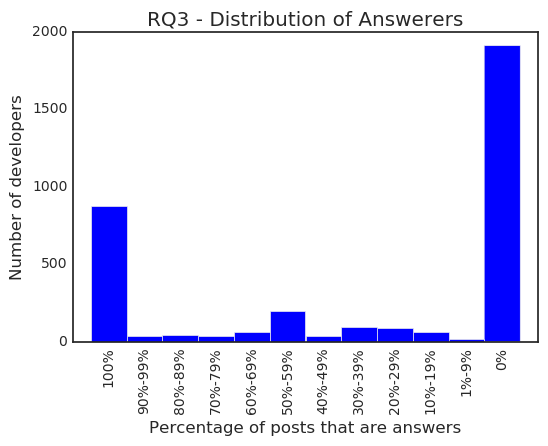

In [438]:
# Create dataframe from sql query
prop_ans_df = pd.DataFrame(dist_posts)

# Define plot style
plt.style.use('seaborn-white')

# Take data from dataframe (shorter variable name, easier to use)
x = prop_ans_df.ratio

bins = [-10,0.09,
        0.1,9.99,
        10,19.99,
        20,29.99,
        30,39.99,
        40,49.99,
        50,59.99,
        60,69.99,
        70,79.99,
        80,89.99,
        90,99.99,
        100,110]

plt.hist(x.astype('float'), bins=bins, color='b', align='left')#Bar chart

plt.xlabel("Percentage of posts that are answers")
plt.ylabel("Number of developers")
plt.title("RQ3 - Distribution of Answerers")

# X ticks label
labels = ['100%']
labels += ['{0}0%-{1}9%'.format(a,a) for a in range(9,0,-1)]
labels += ['1%-9%']
labels += ['0%']

# Invert the X axis, showing 100% at the beginning of the plot
ax = plt.gca()
ax.invert_xaxis()
ax.set_xlim([110,-20])
ax.set_xticks(range(100,-20,-10))
ax.set_xticklabels(labels, rotation='vertical')

plt.show()


#### Map/Reduce

In [451]:
from bson.code import Code

rq3_dist_posts_answerers_map = Code("function () {"
           "  emit(this.OwnerUserId, {PostTypeId: this.PostTypeId});"
           "}")

rq3_dist_posts_answerers_reduce = Code("function (key, values) {"
                       "  var answers = 0;"
                       "  var total = 0;"                
                       "  values.forEach(function(post){"
                       "    if(post.PostTypeId == 2){"
                       "       answers++;"
                       "    }"
                       "    total++;"                     
                       "  });"     
                       "  return answers/total * 100;" 
                       "}"
                       )

db.posts.map_reduce(rq3_dist_posts_answerers_map, 
                     rq3_dist_posts_answerers_reduce, 
                     "rq3_dist_posts_answerers_map")


Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'stackoverflow'), u'rq3_dist_posts_answerers_map')

In [452]:
r = list(db.rq3_dist_posts_answerers_map.find())
r[:10]

[{u'_id': -1.0, u'value': 0.0},
 {u'_id': 20.0, u'value': 94.11764705882352},
 {u'_id': 21.0, u'value': 70.58823529411765},
 {u'_id': 22.0, u'value': 0.0},
 {u'_id': 23.0, u'value': 64.51612903225806},
 {u'_id': 24.0, u'value': 80.0},
 {u'_id': 25.0, u'value': 81.25},
 {u'_id': 26.0, u'value': 80.0},
 {u'_id': 27.0, u'value': {u'PostTypeId': 1.0}},
 {u'_id': 28.0, u'value': 50.0}]

In [455]:
# Create dataframe from sql query
prop_ans_df = pd.DataFrame(r)

# Define plot style
plt.style.use('seaborn-white')

# Take data from dataframe (shorter variable name, easier to use)
x = prop_ans_df.value

bins = [-10,0.09,
        0.1,9.99,
        10,19.99,
        20,29.99,
        30,39.99,
        40,49.99,
        50,59.99,
        60,69.99,
        70,79.99,
        80,89.99,
        90,99.99,
        100,110]

plt.hist(x.astype('float'), bins=bins, color='b', align='left')#Bar chart

plt.xlabel("Percentage of posts that are answers")
plt.ylabel("Number of developers")
plt.title("RQ3 - Distribution of Answerers")

# X ticks label
labels = ['100%']
labels += ['{0}0%-{1}9%'.format(a,a) for a in range(9,0,-1)]
labels += ['1%-9%']
labels += ['0%']

# Invert the X axis, showing 100% at the beginning of the plot
ax = plt.gca()
ax.invert_xaxis()
ax.set_xlim([110,-20])
ax.set_xticks(range(100,-20,-10))
ax.set_xticklabels(labels, rotation='vertical')

plt.show()


TypeError: float() argument must be a string or a number

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta RQ4:

In [ ]:
RQ4 = posts.aggregate( [
        {'$match': { 'AcceptedAnswerId' : {'$ne': ''}}},
        {'$lookup': {
            'from': "posts", 
            'localField': "AcceptedAnswerId",
            'foreignField': "Id",
            'as': "answer"}
        },
        {
            '$project' : {'OwnerUserId': True, 
                           'answerer' : {'$arrayElemAt' :[ '$answer.OwnerUserId' , 0 ]}}
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$answerer'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$answerer'] }},
                        'answers' : {'$addToSet' : { '0q':'$OwnerUserId', '1a': '$answerer'}}
                        }
        },
        {
            '$project': {
                'answers' : True,
                'nanswers' : { '$size' : '$answers'}
            }
        },
        {
            '$match' : { 'nanswers' : { '$eq' : 2}}
        }
    ])
print_respuestas(RQ4)

La explicación es como sigue:

1. Se eligen sólo las preguntas que tienen respuesta (campo `AcceptedAnswerId` no es vacío)
2. Se accede a la tabla `posts` para recuperar los datos de la respuesta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `answers`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

La implementación en Map-Reduce se puede realizar con la misma idea.

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas 

In [ ]:
RQ4 = posts.aggregate( [
        {'$match': { 'AcceptedAnswerId' : {'$ne': ''}}},
        {'$lookup': {
            'from': "posts", 
            'localField': "AcceptedAnswerId",
            'foreignField': "Id",
            'as': "answer"}
        },
        {
            '$project' : {'OwnerUserId': True,
                          'QId' : '$Id',
                          'AId' : '$answer.Id',
                          'answerer' : {'$arrayElemAt' :[ '$answer.OwnerUserId' , 0 ]}}
        },
        {
            '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$answerer'] },
                                 'max' : { '$max' : ['$OwnerUserId' , '$answerer'] }},
                        'answers' : {'$addToSet' : { '0q':'$OwnerUserId', '1a': '$answerer'}},
                        'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
                        }
        },
        {
            '$project': {
                'answers' : True,
                'nanswers' : { '$size' : '$answers'},
                'considered_pairs' : True
            }
        },
        {
            '$match' : { 'nanswers' : { '$eq' : 2}}
        }
    ])
print_respuestas(RQ4)

In [ ]:
(posts.find_one({'Id': 238}), posts.find_one({'Id': 243}),
posts.find_one({'Id': 222}), posts.find_one({'Id': 223}))